***Hướng xử lý: triển khai lựa chọn tính năng, kỹ thuật và xử lý trước dữ liệu trên tập dữ liệu***

Mục tiêu: tối ưu hóa dữ liệu để đạt được hiệu suất tốt nhất có thể với mô hình cố định.

 **NHẬP THƯ VIỆN VÀ KHỞI TẠO MÔ HÌNH ĐÁNH GIÁ**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import sklearn as sk
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from sklearn.model_selection import train_test_split

Mô hình của bài toán

In [2]:
rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

 **LOAD DATA**

In [8]:
df = pd.read_csv('sample_submission.csv', index_col= 'id')

df.head()

target    O2_1   O2_2   O2_3   O2_4   O2_5   O2_6  O2_7  NH4_1  NH4_2  \
id                                                                          
0     8.59   7.500   9.00  9.545  9.265  8.110   8.43  7.15  0.180  0.200   
1     9.10  13.533  40.90  8.770  9.265  6.015  10.07  7.15  1.107  1.027   
2     8.21   3.710   5.42  8.770  9.265  4.550  10.07  7.15  0.020  0.020   
3     8.39   8.700   8.10  9.500  9.200  5.200   8.67  6.67  0.280  0.270   
4     8.07   8.050   8.65  7.960  9.265  3.290  10.07  7.15  0.360  0.435   

    ...  NO3_5  NO3_6  NO3_7  BOD5_1  BOD5_2  BOD5_3  BOD5_4  BOD5_5  BOD5_6  \
id  ...                                                                        
0   ...   4.95  1.730  1.800   4.800    3.15  10.665  10.465  16.645    5.75   
1   ...  20.05  9.530  7.695   4.550    6.95   2.040   5.200   5.725    2.95   
2   ...   4.58  3.025  3.960   4.935    4.95   4.725   6.075   6.750    3.50   
3   ...   8.45  2.070  1.730   6.300    4.70   3.500   6.200   8.670    2.90   
4   ...   2.02  1.730  0.760   4.800    4.97   3.950   2.800   8.400    3.50   

    BOD5_7  
id          
0    10.37  
1     2.23  
2     3.17  
3     7.37  
4     3.90  

[5 rows x 36 columns]

In [9]:
df_copy=df.copy()

In [11]:
X = df.drop(['target'], axis=1)
y = df['target']

Xem mô hình thực hiện như thế nào

In [12]:
print(cross_val_score(rf, X, y, cv = 5, scoring = 'neg_root_mean_squared_error'))
rf.fit(X, y)

[-2.61056522 -1.01930614 -1.15758718 -1.0183318  -1.19130388]


RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

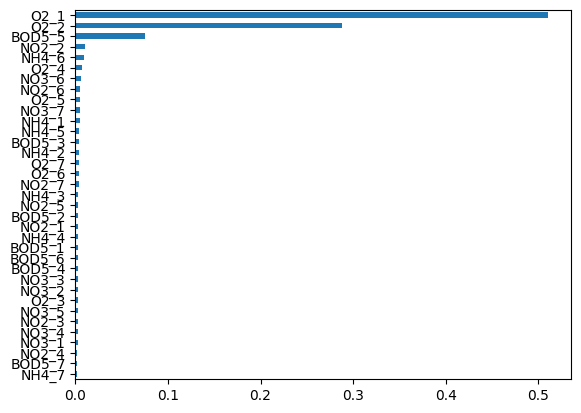

In [6]:
feature_importances = pd.Series(rf.feature_importances_, index = X.columns)
feature_importances.nsmallest(35).plot(kind = 'barh')
plt.show()

In [7]:
df.shape

(3500, 36)

<Axes: xlabel='O2_1', ylabel='O2_2'>

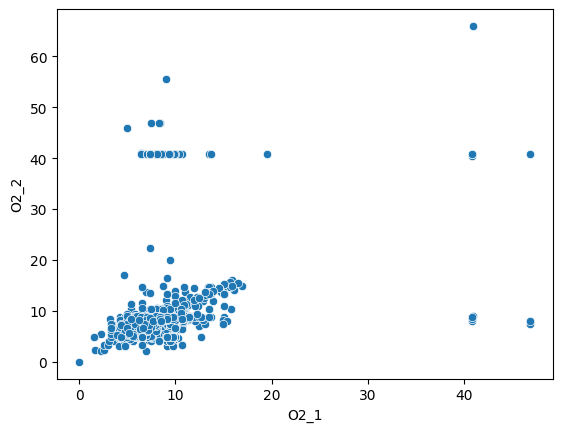

In [9]:
sns.scatterplot(data = df, x='O2_1', y = 'O2_2')

Nhận xét:
- Hầu hết các điểm dữ liệu tập trung trong một cụm ở góc dưới trái của biểu đồ. Điều này cho thấy rằng cho một giá trị thấp của '02_1', giá trị tương ứng của '02_2' cũng thấp.
-  Có một số điểm dữ liệu phân tán xa cụm chính, đặc biệt là trên trục '02_2'. Điều này có thể chỉ ra rằng, trong một số trường hợp, giá trị của '02_2' có thể trở nên rất cao mà không phụ thuộc nhiều vào giá trị của '02_1'.
- Những điểm dữ liệu rải rác, đặc biệt là những điểm ở phía trên của biểu đồ, có thể được coi là ngoại lệ hoặc outliers

**TỔNG QUAN VỀ DỮ LIỆU**

In [10]:
df.shape

(3500, 36)

In [11]:
df.describe().T.style.background_gradient(cmap="summer")

-Dữ liệu sẽ yêu cầu chia tỷ lệ vì một số tính năng như NO2_1 có giá trị tối đa là 0,95. Trong khi các tính năng khác bao gồm các giá trị cực cao như BOD5_5 có giá trị tối đa là 82,45

In [12]:
df.isnull().sum()

target    0
O2_1      0
O2_2      0
O2_3      0
O2_4      0
O2_5      0
O2_6      0
O2_7      0
NH4_1     0
NH4_2     0
NH4_3     0
NH4_4     0
NH4_5     0
NH4_6     0
NH4_7     0
NO2_1     0
NO2_2     0
NO2_3     0
NO2_4     0
NO2_5     0
NO2_6     0
NO2_7     0
NO3_1     0
NO3_2     0
NO3_3     0
NO3_4     0
NO3_5     0
NO3_6     0
NO3_7     0
BOD5_1    0
BOD5_2    0
BOD5_3    0
BOD5_4    0
BOD5_5    0
BOD5_6    0
BOD5_7    0
dtype: int64

Kiểm tra dữ liệu có bị trùng không

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 3499
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  3500 non-null   float64
 1   O2_1    3500 non-null   float64
 2   O2_2    3500 non-null   float64
 3   O2_3    3500 non-null   float64
 4   O2_4    3500 non-null   float64
 5   O2_5    3500 non-null   float64
 6   O2_6    3500 non-null   float64
 7   O2_7    3500 non-null   float64
 8   NH4_1   3500 non-null   float64
 9   NH4_2   3500 non-null   float64
 10  NH4_3   3500 non-null   float64
 11  NH4_4   3500 non-null   float64
 12  NH4_5   3500 non-null   float64
 13  NH4_6   3500 non-null   float64
 14  NH4_7   3500 non-null   float64
 15  NO2_1   3500 non-null   float64
 16  NO2_2   3500 non-null   float64
 17  NO2_3   3500 non-null   float64
 18  NO2_4   3500 non-null   float64
 19  NO2_5   3500 non-null   float64
 20  NO2_6   3500 non-null   float64
 21  NO2_7   3500 non-null   float64
 22  

Tất cả dữ liệu đều thuộc loại float64 do đó không yêu cầu chuyển đổi loại dữ liệu.

**TIỀN XỬ LÝ DỮ LIỆU**

Biểu đồ phân tán của O2_1 và O2_2 với biến target trước khi loại bỏ ngoại lệ 

<Axes: xlabel='O2_1', ylabel='target'>

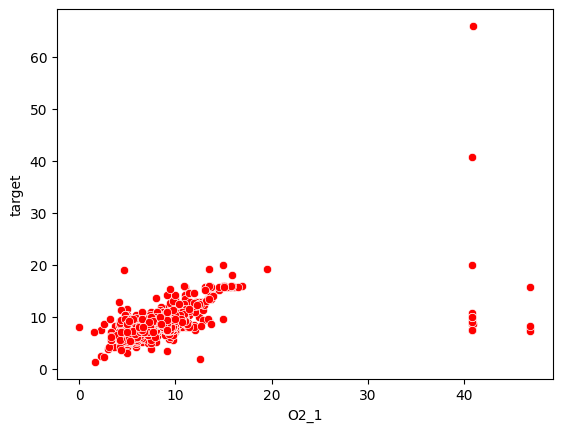

In [15]:
sns.scatterplot(x='O2_1', y='target', data=df, color='red')

O2_1 có các điểm ngoại lệ lớn hơn 40 nằm rải rác

<Axes: xlabel='O2_2', ylabel='target'>

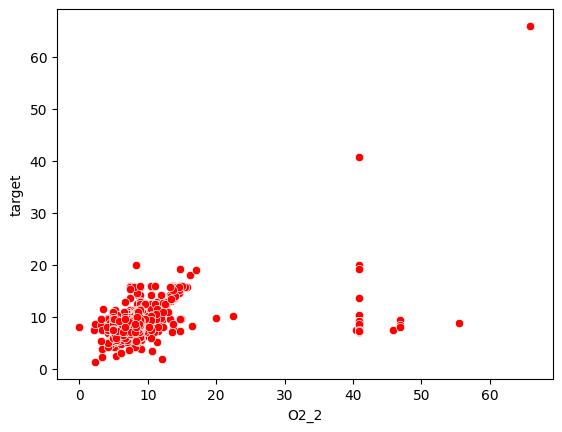

In [16]:
sns.scatterplot(x='O2_2', y='target', data=df, color='red')


Tương tự thì O2_2 có các điểm ngoại lệ lớn hơn 60 điểm

*Xử lý ngoại lệ bằng mô hình Autoencoder*

In [13]:
features = df.columns.drop('target')
features

Index(['O2_1', 'O2_2', 'O2_3', 'O2_4', 'O2_5', 'O2_6', 'O2_7', 'NH4_1',
       'NH4_2', 'NH4_3', 'NH4_4', 'NH4_5', 'NH4_6', 'NH4_7', 'NO2_1', 'NO2_2',
       'NO2_3', 'NO2_4', 'NO2_5', 'NO2_6', 'NO2_7', 'NO3_1', 'NO3_2', 'NO3_3',
       'NO3_4', 'NO3_5', 'NO3_6', 'NO3_7', 'BOD5_1', 'BOD5_2', 'BOD5_3',
       'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7'],
      dtype='object')

Chuẩn hóa dữ liệu

In [14]:
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

Xây dựng mô hình Autoencoder

In [15]:
input_layer = Input(shape=(df[features].shape[1],))
encoded = Dense(100, activation='relu')(input_layer)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(25, activation='relu')(encoded)

decoded = Dense(50, activation='relu')(encoded)
decoded = Dense(100, activation='relu')(decoded)
decoded = Dense(df[features].shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)

In [16]:
#compile model
autoencoder.compile(optimizer='adam', loss='mse')

In [17]:
#train model
autoencoder.fit(df[features], df[features],
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_split=0.2)


Epoch 1/100
11/11 [==============================] - 1s 32ms/step - loss: 0.1254 - val_loss: 0.1169
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0982 - val_loss: 0.0674
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0434 - val_loss: 0.0277
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0242 - val_loss: 0.0199
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0175 - val_loss: 0.0156
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0152 - val_loss: 0.0145
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0143 - val_loss: 0.0137
Epoch 8/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0136 - val_loss: 0.0133
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0130 - val_loss: 0.0127
Epoch 10/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0123 - val_loss: 0.0120
Epoch 11

Tính toán sai số giữa dữ liệu gốc và dữ liệu đã được loại bỏ ngoại lệ


In [18]:
predictions = autoencoder.predict(df[features])
mse = np.mean(np.power(df[features] - predictions, 2), axis=1)

110/110 [==============================] - 0s 1ms/step


Biểu đồ phân phối của MSE 

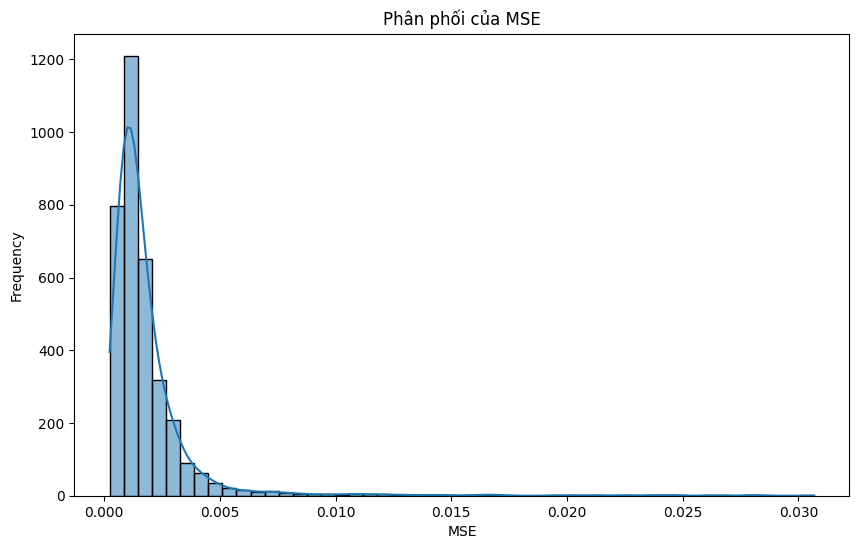

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(mse, bins=50, kde=True)
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.title('Phân phối của MSE')
plt.show()

Nhận xét:
- Phân phối của MSE tập trung chủ yếu ở phía bên trái của biểu đồ, với một số lượng lớn các giá trị nằm gần 0. Điều này cho thấy rằng phần lớn các dự đoán khá gần với giá trị thực tế.
- MSE có giá trị từ 0 đến khoảng 0.030, nhưng phần lớn các giá trị tập trung dưới 0.010

In [19]:
threshold = np.quantile(mse, 0.95)
print(f"Ngưỡng MSE được chọn: {threshold}")

Ngưỡng MSE được chọn: 0.005104946402390771


In [20]:
outliers = mse > threshold
print(f"Số lượng ngoại lệ được xác định: {np.sum(outliers)}")

Số lượng ngoại lệ được xác định: 175


In [21]:
df_cleaned = df[~outliers]
print(f"Kích thước của tập dữ liệu sau khi xóa dữ liệu ngoại lệ: {df_cleaned.shape}")

Kích thước của tập dữ liệu sau khi xóa dữ liệu ngoại lệ: (3325, 36)


Xem lại phân phối dữ liệu của O2_1 và O2_2 sau khi loại bỏ dữ liệu ngoại lệ

<Axes: xlabel='O2_1', ylabel='target'>

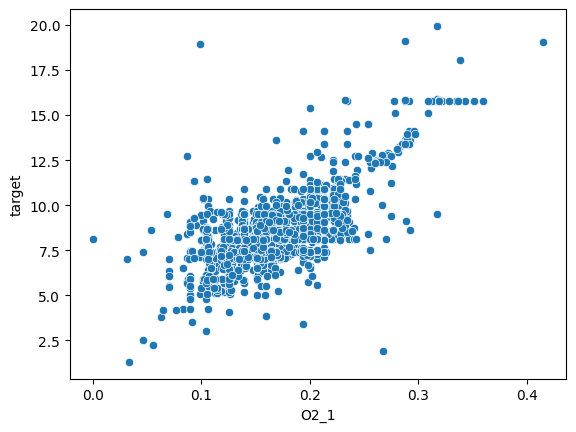

In [27]:
sns.scatterplot(data = df_cleaned, x = "O2_1", y="target")

Mối quan hệ giữa O2_1 và biến target được thể hiện rõ hơn

<Axes: xlabel='O2_2', ylabel='target'>

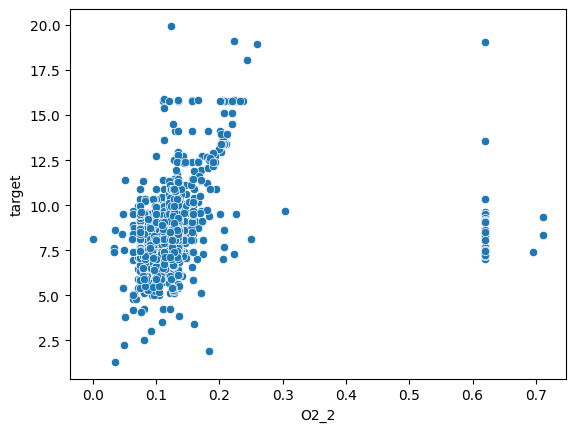

In [28]:
sns.scatterplot(data = df_cleaned, x = "O2_2", y="target")

Tương tự O2_2 cũng vậy

In [22]:
df=df_cleaned

In [23]:
y = df['target']
X = df.drop('target', axis=1)

Chuẩn hóa dữ liệu sau khi loại bỏ ngoại lệ


In [24]:
Scaler = MinMaxScaler()
numerical_scaled = pd.DataFrame(Scaler.fit_transform(X), columns=X.columns)
numerical_scaled

O2_1      O2_2      O2_3      O2_4      O2_5      O2_6      O2_7  \
0     0.384615  0.191693  0.384519  0.528653  0.410589  0.560133  0.449686   
1     0.694000  0.871140  0.319665  0.528653  0.301843  0.669103  0.449686   
2     0.190256  0.115442  0.319665  0.528653  0.225798  0.669103  0.449686   
3     0.446154  0.172524  0.380753  0.523719  0.259538  0.576080  0.419497   
4     0.412821  0.184239  0.251883  0.528653  0.160394  0.669103  0.449686   
...        ...       ...       ...       ...       ...       ...       ...   
3320  0.320513  0.176784  0.238075  0.528653  0.284973  0.568439  0.398428   
3321  0.340000  0.141214  0.286192  0.402277  0.022632  0.560133  0.449686   
3322  0.429077  0.179617  0.319665  0.293738  0.290683  0.691030  0.452830   
3323  0.512821  0.141214  0.384519  0.528653  0.160394  0.596678  0.145283   
3324  0.435897  0.172524  0.384519  0.528653  0.410589  0.651495  0.449686   

         NH4_1     NH4_2     NH4_3  ...     NO3_5     NO3_6     NO3_7  \
0     0.062016  0.050279  0.110879  ...  0.140348  0.088865  0.092999   
1     0.421318  0.281285  0.361506  ...  0.572319  0.492091  0.397572   
2     0.000000  0.000000  0.110879  ...  0.129763  0.155811  0.204598   
3     0.100775  0.069832  0.336820  ...  0.240474  0.106441  0.089383   
4     0.131783  0.115922  0.110879  ...  0.056528  0.088865  0.039266   
...        ...       ...       ...  ...       ...       ...       ...   
3320  0.211240  0.152235  0.803347  ...  0.415694  0.032310  0.084733   
3321  0.496124  0.608939  0.317992  ...  0.129763  0.088865  0.092999   
3322  0.158915  0.106145  0.361506  ...  0.572319  0.073873  0.092999   
3323  0.108527  0.050279  0.217573  ...  0.572319  0.492091  0.397572   
3324  0.075581  0.050279  0.110879  ...  0.086566  0.088865  0.092999   

        BOD5_1    BOD5_2    BOD5_3    BOD5_4    BOD5_5    BOD5_6    BOD5_7  
0     0.400585  0.288474  1.000000  0.470851  0.509493  0.521091  1.000000  
1     0.376218  0.646593  0.121243  0.177127  0.129072  0.250193  0.071836  
2     0.413743  0.458110  0.394804  0.225941  0.164780  0.303406  0.179019  
3     0.546784  0.434549  0.269995  0.232915  0.231667  0.245356  0.657925  
4     0.400585  0.459994  0.315843  0.043236  0.222261  0.303406  0.262258  
...        ...       ...       ...       ...       ...       ...       ...  
3320  0.345517  0.378004  0.198675  0.107392  0.197701  0.307276  0.102623  
3321  0.410331  0.288474  0.121243  0.225941  0.222783  0.173278  0.148233  
3322  0.407115  0.447083  0.394804  0.163180  0.222261  0.605747  0.296465  
3323  0.975634  0.500518  0.394804  0.071130  0.164780  0.605747  0.387685  
3324  0.100390  0.229102  0.121243  0.000837  0.222783  0.250193  0.076397  

[3325 rows x 35 columns]

Xem mối tương quan

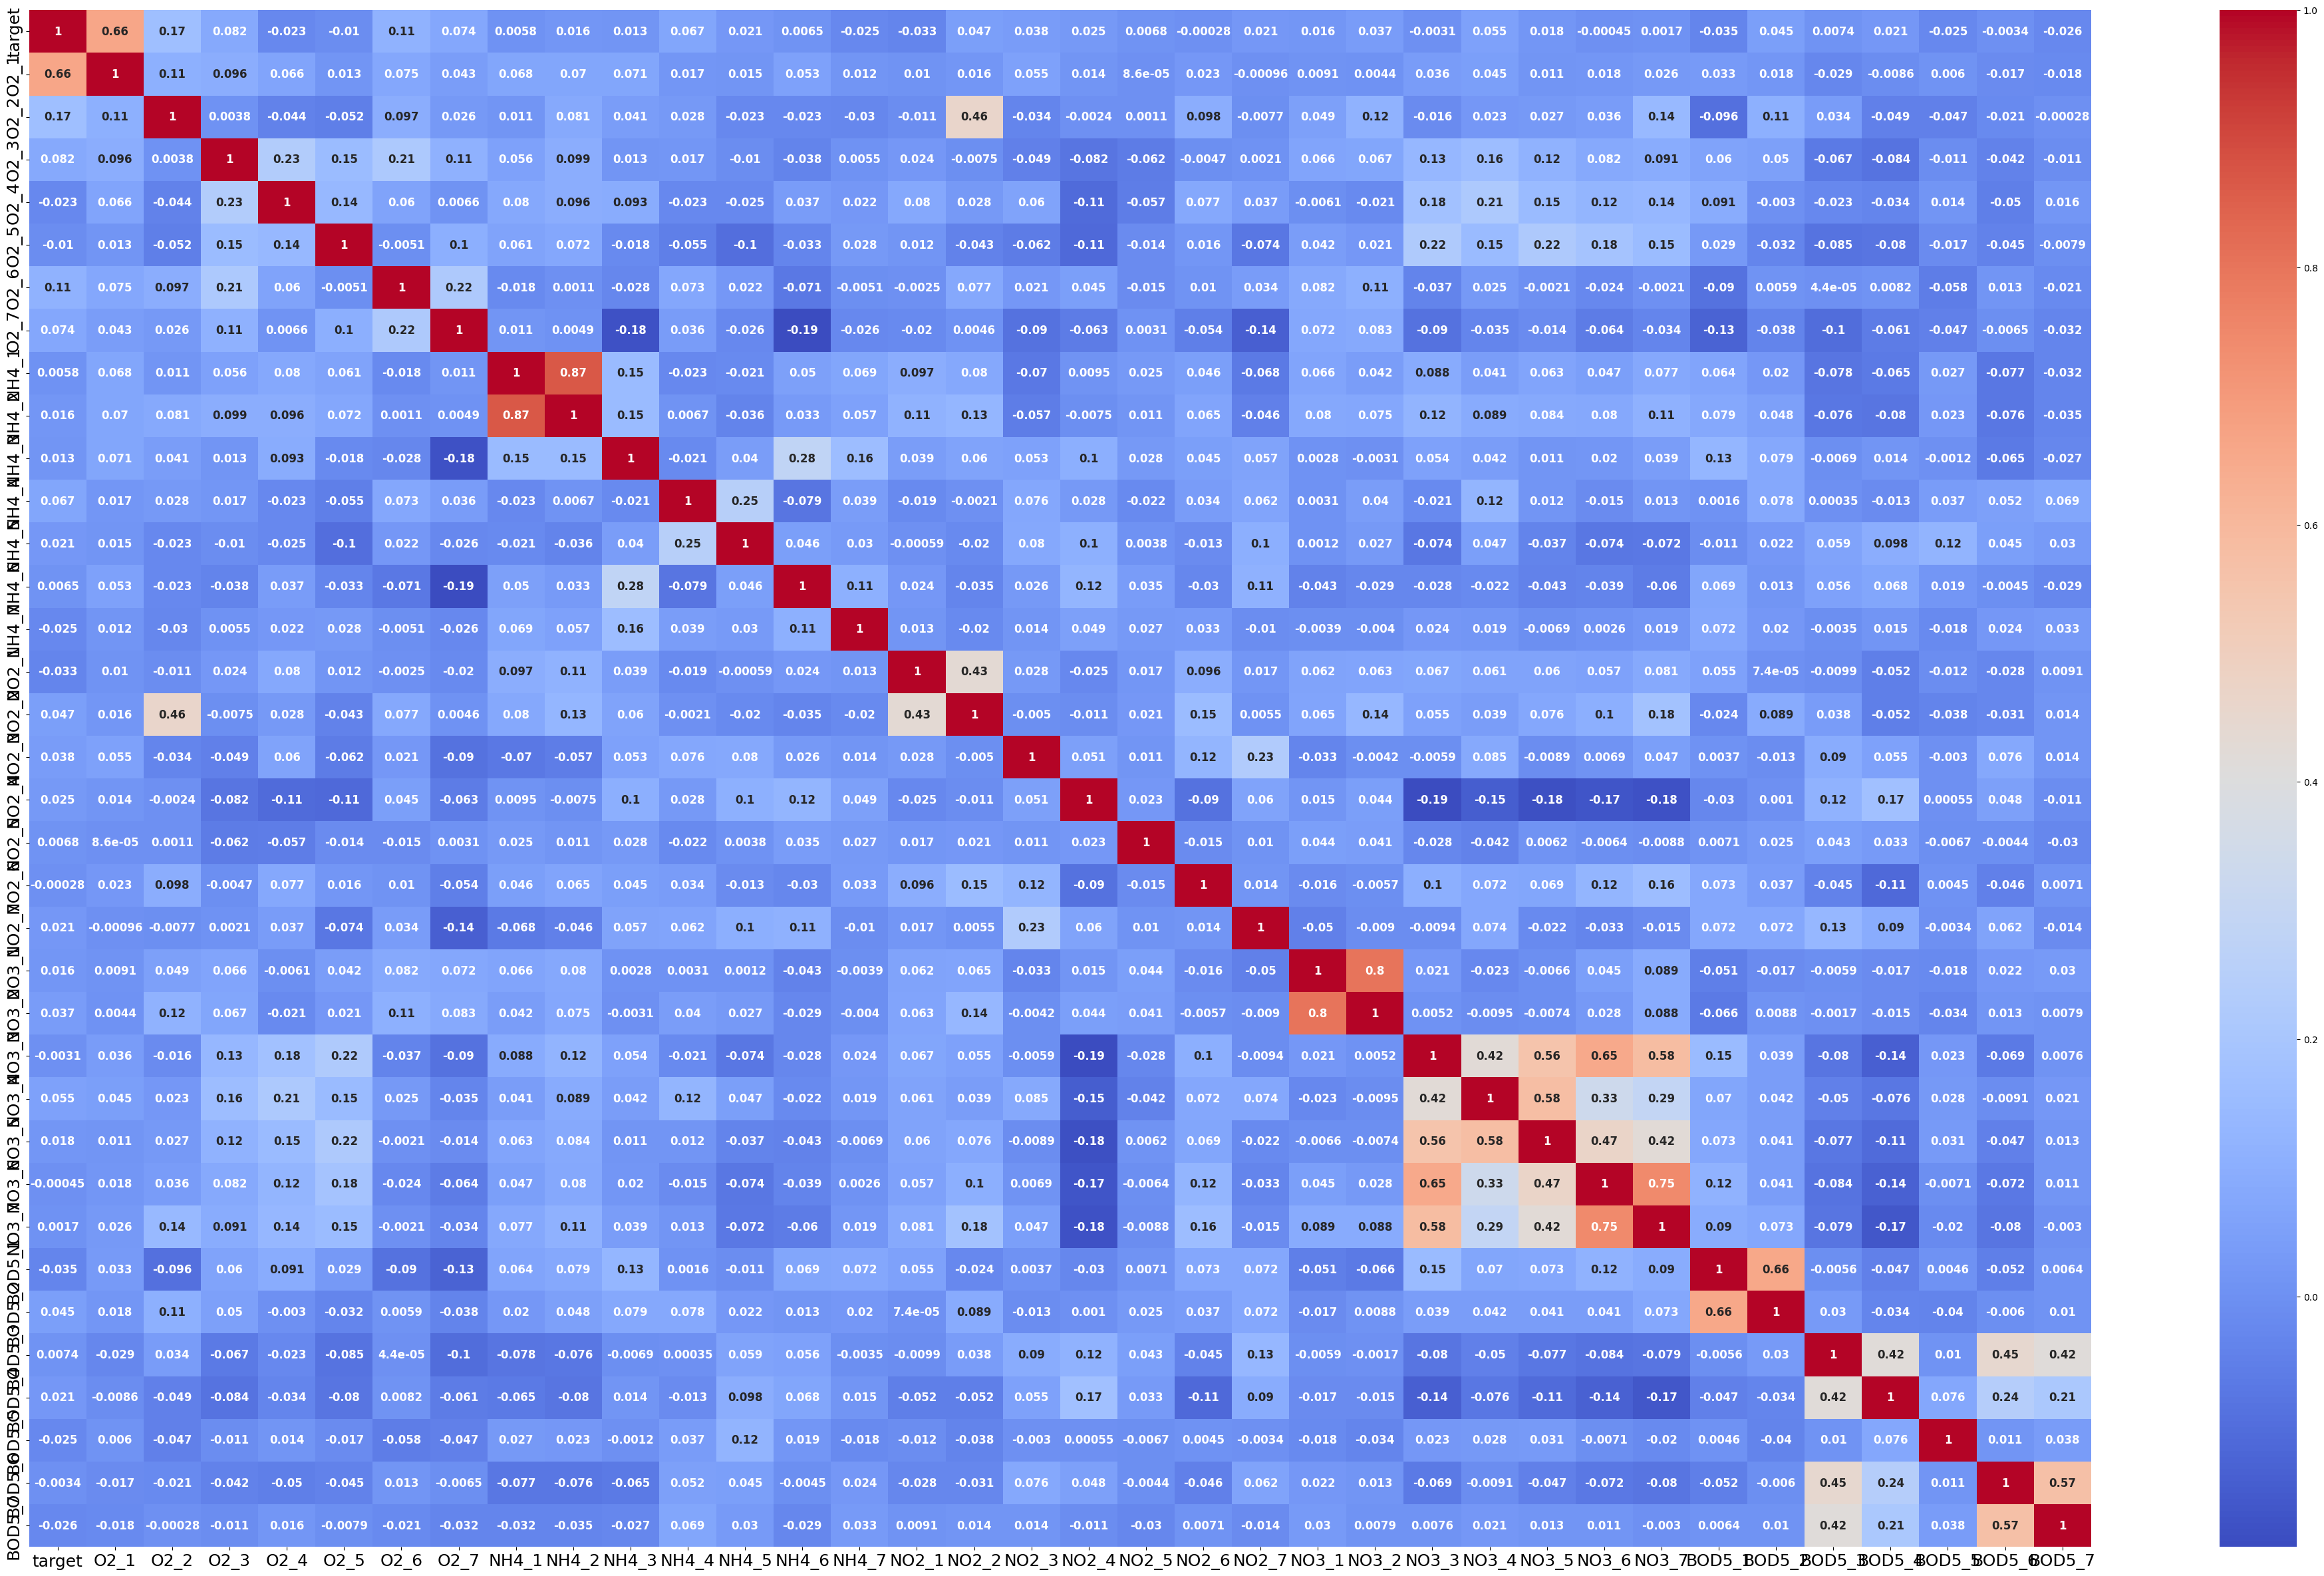

In [32]:
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, annot_kws={"size": 12, "weight": "bold"})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Kiểm tra tính năng nào có mối tương quan tốt nhất

In [33]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(df, 0.8)
corr_features

{'NH4_2'}

In [34]:
X.shape

(3325, 35)

Tính năng hữu ích trong việc dự đoán biến mục tiêu

In [35]:
correlation_matrix = df.corr()
correlations_with_target = correlation_matrix['target']
print(correlations_with_target)

target    1.000000
O2_1      0.660460
O2_2      0.168121
O2_3      0.082300
O2_4     -0.023313
O2_5     -0.010381
O2_6      0.114062
O2_7      0.073805
NH4_1     0.005794
NH4_2     0.016414
NH4_3     0.013114
NH4_4     0.066771
NH4_5     0.020531
NH4_6     0.006489
NH4_7    -0.024568
NO2_1    -0.033449
NO2_2     0.047217
NO2_3     0.037962
NO2_4     0.024531
NO2_5     0.006819
NO2_6    -0.000283
NO2_7     0.021307
NO3_1     0.015750
NO3_2     0.037251
NO3_3    -0.003109
NO3_4     0.054776
NO3_5     0.017984
NO3_6    -0.000446
NO3_7     0.001709
BOD5_1   -0.034832
BOD5_2    0.044981
BOD5_3    0.007395
BOD5_4    0.021154
BOD5_5   -0.024569
BOD5_6   -0.003382
BOD5_7   -0.025662
Name: target, dtype: float64


O2_1, O2_2, O2_6, NH4_5 có mối tương quan cao hơn so với các tính năng còn lại

In [25]:
print(cross_val_score(rf, X, y, cv = 5, scoring = 'neg_root_mean_squared_error'))
rf.fit(X, y)

[-1.08872488 -0.98703601 -1.0317405  -1.01267868 -0.90671236]


RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

!!! Lỗi mô hình đã giảm đi khá nhiều

<Axes: >

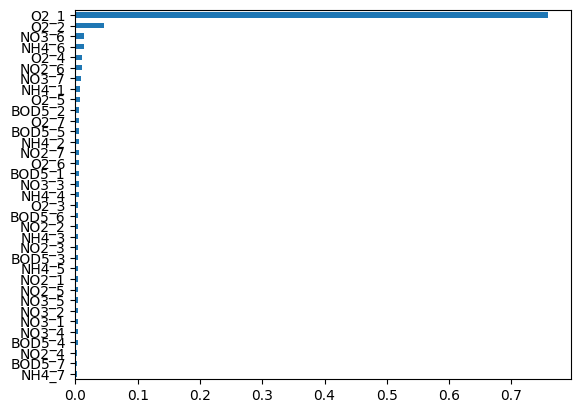

In [37]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nsmallest(35).plot(kind='barh')

Không có thay đổi nào so với bộ dữ liệu đầu, O2_1 vẫn là feature quan trọng nhất

In [26]:
# Lưu bộ data đã xử lý
df.to_csv('data_cleaned.csv', index=False)

In [27]:
df

target      O2_1      O2_2      O2_3      O2_4      O2_5      O2_6  \
id                                                                         
0       8.59  0.159744  0.136467  0.387083  0.357179  0.133615  0.209754   
1       9.10  0.288243  0.620167  0.322500  0.357179  0.098226  0.250560   
2       8.21  0.079020  0.082183  0.322500  0.357179  0.073480  0.250560   
3       8.39  0.185304  0.122820  0.383333  0.353846  0.084459  0.215725   
4       8.07  0.171459  0.131160  0.255000  0.357179  0.052196  0.250560   
...      ...       ...       ...       ...       ...       ...       ...   
3495    8.08  0.133120  0.125853  0.241250  0.357179  0.092736  0.212864   
3496    8.09  0.141214  0.100531  0.289167  0.271795  0.007365  0.209754   
3497    9.95  0.178211  0.127870  0.322500  0.198462  0.094595  0.258771   
3498    9.52  0.212993  0.100531  0.387083  0.357179  0.052196  0.223439   
3499    8.51  0.181044  0.122820  0.387083  0.357179  0.133615  0.243966   

          O2_7     NH4_1     NH4_2  ...     NO3_5     NO3_6     NO3_7  \
id                                  ...                                 
0     0.449686  0.038278  0.050279  ...  0.140348  0.088865  0.066605   
1     0.449686  0.260048  0.281285  ...  0.572319  0.492091  0.284736   
2     0.449686  0.000000  0.000000  ...  0.129763  0.155811  0.146531   
3     0.419497  0.062201  0.069832  ...  0.240474  0.106441  0.064015   
4     0.449686  0.081340  0.115922  ...  0.056528  0.088865  0.028122   
...        ...       ...       ...  ...       ...       ...       ...   
3495  0.398428  0.130383  0.152235  ...  0.415694  0.032310  0.060685   
3496  0.449686  0.306220  0.608939  ...  0.129763  0.088865  0.066605   
3497  0.452830  0.098086  0.106145  ...  0.572319  0.073873  0.066605   
3498  0.145283  0.066986  0.050279  ...  0.572319  0.492091  0.284736   
3499  0.449686  0.046651  0.050279  ...  0.086566  0.088865  0.066605   

        BOD5_1    BOD5_2    BOD5_3    BOD5_4    BOD5_5    BOD5_6    BOD5_7  
id                                                                          
0     0.381769  0.288474  0.517942  0.158126  0.181835  0.283310  1.000000  
1     0.359206  0.646593  0.062797  0.059485  0.046065  0.136027  0.071836  
2     0.393953  0.458110  0.204485  0.075878  0.058809  0.164957  0.179019  
3     0.517148  0.434549  0.139842  0.078220  0.082681  0.133396  0.657925  
4     0.381769  0.459994  0.163588  0.014520  0.079324  0.164957  0.262258  
...        ...       ...       ...       ...       ...       ...       ...  
3495  0.330776  0.378004  0.102902  0.036066  0.070558  0.167061  0.102623  
3496  0.390794  0.288474  0.062797  0.075878  0.079510  0.094209  0.148233  
3497  0.387816  0.447083  0.204485  0.054801  0.079324  0.329336  0.296465  
3498  0.914260  0.500518  0.204485  0.023888  0.058809  0.329336  0.387685  
3499  0.103791  0.229102  0.062797  0.000281  0.079510  0.136027  0.076397  

[3325 rows x 36 columns]

In [29]:
data_test = pd.read_csv('data_cleaned.csv')

data_test

target      O2_1      O2_2      O2_3      O2_4      O2_5      O2_6  \
0       8.59  0.159744  0.136467  0.387083  0.357179  0.133615  0.209754   
1       9.10  0.288243  0.620167  0.322500  0.357179  0.098226  0.250560   
2       8.21  0.079020  0.082183  0.322500  0.357179  0.073480  0.250560   
3       8.39  0.185304  0.122820  0.383333  0.353846  0.084459  0.215725   
4       8.07  0.171459  0.131160  0.255000  0.357179  0.052196  0.250560   
...      ...       ...       ...       ...       ...       ...       ...   
3320    8.08  0.133120  0.125853  0.241250  0.357179  0.092736  0.212864   
3321    8.09  0.141214  0.100531  0.289167  0.271795  0.007365  0.209754   
3322    9.95  0.178211  0.127870  0.322500  0.198462  0.094595  0.258771   
3323    9.52  0.212993  0.100531  0.387083  0.357179  0.052196  0.223439   
3324    8.51  0.181044  0.122820  0.387083  0.357179  0.133615  0.243966   

          O2_7     NH4_1     NH4_2  ...     NO3_5     NO3_6     NO3_7  \
0     0.449686  0.038278  0.050279  ...  0.140348  0.088865  0.066605   
1     0.449686  0.260048  0.281285  ...  0.572319  0.492091  0.284736   
2     0.449686  0.000000  0.000000  ...  0.129763  0.155811  0.146531   
3     0.419497  0.062201  0.069832  ...  0.240474  0.106441  0.064015   
4     0.449686  0.081340  0.115922  ...  0.056528  0.088865  0.028122   
...        ...       ...       ...  ...       ...       ...       ...   
3320  0.398428  0.130383  0.152235  ...  0.415694  0.032310  0.060685   
3321  0.449686  0.306220  0.608939  ...  0.129763  0.088865  0.066605   
3322  0.452830  0.098086  0.106145  ...  0.572319  0.073873  0.066605   
3323  0.145283  0.066986  0.050279  ...  0.572319  0.492091  0.284736   
3324  0.449686  0.046651  0.050279  ...  0.086566  0.088865  0.066605   

        BOD5_1    BOD5_2    BOD5_3    BOD5_4    BOD5_5    BOD5_6    BOD5_7  
0     0.381769  0.288474  0.517942  0.158126  0.181835  0.283310  1.000000  
1     0.359206  0.646593  0.062797  0.059485  0.046065  0.136027  0.071836  
2     0.393953  0.458110  0.204485  0.075878  0.058809  0.164957  0.179019  
3     0.517148  0.434549  0.139842  0.078220  0.082681  0.133396  0.657925  
4     0.381769  0.459994  0.163588  0.014520  0.079324  0.164957  0.262258  
...        ...       ...       ...       ...       ...       ...       ...  
3320  0.330776  0.378004  0.102902  0.036066  0.070558  0.167061  0.102623  
3321  0.390794  0.288474  0.062797  0.075878  0.079510  0.094209  0.148233  
3322  0.387816  0.447083  0.204485  0.054801  0.079324  0.329336  0.296465  
3323  0.914260  0.500518  0.204485  0.023888  0.058809  0.329336  0.387685  
3324  0.103791  0.229102  0.062797  0.000281  0.079510  0.136027  0.076397  

[3325 rows x 36 columns]

In [30]:
X=data_test.drop('target', axis=1)
y=data_test['target']

In [31]:
print(cross_val_score(rf, X, y, cv = 5, scoring = 'neg_root_mean_squared_error'))
rf.fit(X, y)

[-1.08872488 -0.98703601 -1.0317405  -1.01267868 -0.90671236]


RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

**TẠO TÍNH NĂNG MỚI**

Tạo một khung dữ liệu mới từ mô hình Autoencoder, sau đó kết hợp các tính năng tùy chỉnh cũ và mới, rồi huấn luyện mô hình trên khung dữ liệu mới

In [38]:
X_autoencoder = df_copy[['O2_1', 'O2_2', 'O2_4', 'BOD5_6', 'NO3_3']]

In [39]:
X_autoencoder.shape

(3500, 5)

In [43]:
#Chuẩn hóa dữ liệu
Scaler = MinMaxScaler()
numerical_scaled = pd.DataFrame(Scaler.fit_transform(X_autoencoder), columns=X_autoencoder.columns)
numerical_scaled

O2_1      O2_2      O2_4    BOD5_6     NO3_3
0     0.159744  0.136467  0.357179  0.283310  0.071889
1     0.288243  0.620167  0.357179  0.136027  0.096544
2     0.079020  0.082183  0.357179  0.164957  0.182488
3     0.185304  0.122820  0.353846  0.133396  0.093088
4     0.171459  0.131160  0.357179  0.164957  0.096544
...        ...       ...       ...       ...       ...
3495  0.133120  0.125853  0.357179  0.167061  0.093318
3496  0.141214  0.100531  0.271795  0.094209  0.093088
3497  0.178211  0.127870  0.198462  0.329336  0.093088
3498  0.212993  0.100531  0.357179  0.329336  0.676037
3499  0.181044  0.122820  0.357179  0.136027  0.096544

[3500 rows x 5 columns]

In [44]:
X= numerical_scaled
y= df_copy['target']

Xây dựng mô hình Autoencoder 

In [45]:
input_layer = Input(shape=(X.shape[1],))
encoded = Dense(100, activation='relu')(input_layer)
encoded = Dense(50, activation='relu')(encoded)

decoded = Dense(100, activation='relu')(encoded)
decoded = Dense(X.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)

In [46]:
#compile model
autoencoder.compile(optimizer='adam', loss='mse')

In [47]:
#train model
autoencoder.fit(X, X,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_split=0.2)

Epoch 1/100


11/11 [==============================] - 1s 22ms/step - loss: 0.0917 - val_loss: 0.0758
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0582 - val_loss: 0.0349
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0230 - val_loss: 0.0155
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0168 - val_loss: 0.0150
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0133 - val_loss: 0.0108
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0102 - val_loss: 0.0080
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.0064
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 0.0057
Epoch 9/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0059 - val_loss: 0.0050
Epoch 10/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 11/100
11/11 [

Sử dụng bộ mã hóa (encoder) để tạo các đặc trưng mới

In [49]:
encoder_model = Model(inputs=input_layer, outputs=encoded)
X_encoded = encoder_model.predict(X)

110/110 [==============================] - 0s 1ms/step


Tạo DataFrame cho các tính năng mới

In [50]:
X_encoded_df = pd.DataFrame(X_encoded, columns=[f'encoded_feature_{i}' for i in range(X_encoded.shape[1])])

In [51]:
X_encoded_df

encoded_feature_0  encoded_feature_1  encoded_feature_2  \
0              0.419740           0.415656           0.496519   
1              0.415428           0.401286           0.494885   
2              0.371918           0.309341           0.420372   
3              0.395656           0.395860           0.485312   
4              0.399215           0.390453           0.483591   
...                 ...                ...                ...   
3495           0.392585           0.374174           0.479145   
3496           0.365467           0.392733           0.455954   
3497           0.398406           0.468483           0.447192   
3498           0.398408           0.167770           0.177403   
3499           0.395401           0.391691           0.483704   

      encoded_feature_3  encoded_feature_4  encoded_feature_5  \
0              0.447110           0.184653           0.545769   
1              0.548570           0.573518           0.869086   
2              0.431193           0.306879           0.417627   
3              0.419313           0.289805           0.538373   
4              0.429443           0.274881           0.535437   
...                 ...                ...                ...   
3495           0.433314           0.252449           0.521343   
3496           0.400416           0.311831           0.515694   
3497           0.423113           0.246077           0.535357   
3498           0.473495           0.786135           0.172064   
3499           0.420929           0.289440           0.534137   

      encoded_feature_6  encoded_feature_7  encoded_feature_8  \
0              0.284354                0.0                0.0   
1              0.378745                0.0                0.0   
2              0.292682                0.0                0.0   
3              0.284708                0.0                0.0   
4              0.285796                0.0                0.0   
...                 ...                ...                ...   
3495           0.291738                0.0                0.0   
3496           0.323293                0.0                0.0   
3497           0.344495                0.0                0.0   
3498           0.250969                0.0                0.0   
3499           0.284169                0.0                0.0   

      encoded_feature_9  ...  encoded_feature_40  encoded_feature_41  \
0              0.257516  ...            0.412297            0.309400   
1              0.312030  ...            0.567621            0.056143   
2              0.274196  ...            0.444463            0.231436   
3              0.320279  ...            0.480525            0.240142   
4              0.303547  ...            0.466385            0.249780   
...                 ...  ...                 ...                 ...   
3495           0.300522  ...            0.460515            0.242839   
3496           0.345400  ...            0.496045            0.226465   
3497           0.255395  ...            0.402385            0.356737   
3498           0.070759  ...            0.374061            0.277112   
3499           0.317453  ...            0.478503            0.239437   

      encoded_feature_42  encoded_feature_43  encoded_feature_44  \
0               0.049479            0.446144            0.295205   
1               0.000000            0.428450            0.562219   
2               0.121373            0.573807            0.399655   
3               0.074132            0.407580            0.287138   
4               0.061059            0.432242            0.303871   
...                  ...                 ...                 ...   
3495            0.061033            0.445704            0.314275   
3496            0.092899            0.362549            0.239301   
3497            0.061897            0.382939            0.210287   
3498            0.194171            1.135429            0.825613   
3499            0.073951            0.416893      

In [52]:
rf.fit(X_encoded_df, y)

RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

Chọn ra top 10 tính năng mới quan trọng 

In [53]:
feature_importances = rf.feature_importances_
features_and_importances = zip(X_encoded_df.columns, feature_importances)
top_10_features = sorted(features_and_importances, key=lambda x: x[1], reverse=True)[:10]

In [54]:
for feature, importance in top_10_features:
    print(f'{feature}: {importance}')

encoded_feature_14: 0.2172811458677643
encoded_feature_27: 0.20058990510488417
encoded_feature_49: 0.1553933617638704
encoded_feature_20: 0.06851077003833102
encoded_feature_37: 0.031135246025558918
encoded_feature_36: 0.028185856874353855
encoded_feature_18: 0.024660662766416385
encoded_feature_11: 0.02437322116727946
encoded_feature_12: 0.0229991563093579
encoded_feature_40: 0.018626665023738883


In [55]:
selected_features = [feature for feature, importance in top_10_features]
selected_features

['encoded_feature_14',
 'encoded_feature_27',
 'encoded_feature_49',
 'encoded_feature_20',
 'encoded_feature_37',
 'encoded_feature_36',
 'encoded_feature_18',
 'encoded_feature_11',
 'encoded_feature_12',
 'encoded_feature_40']

In [56]:
X_selected = X_encoded_df[selected_features]

In [57]:
selected_data = pd.concat([X_selected, df_copy['target']], axis=1)

In [58]:
selected_data

encoded_feature_14  encoded_feature_27  encoded_feature_49  \
0               0.549248            0.316658            0.497552   
1               0.267108            0.991107            0.949001   
2               0.496552            0.175662            0.408074   
3               0.449205            0.279190            0.634882   
4               0.470768            0.287588            0.592824   
...                  ...                 ...                 ...   
3495            0.486484            0.264121            0.514497   
3496            0.380896            0.244808            0.484248   
3497            0.439049            0.366379            0.347111   
3498            0.452780            0.295876            0.627682   
3499            0.453772            0.276387            0.628478   

      encoded_feature_20  encoded_feature_37  encoded_feature_36  \
0               0.301104            0.351622            0.335289   
1               0.185940            0.310807            0.331940   
2               0.293807            0.380542            0.440951   
3               0.282241            0.391865            0.406871   
4               0.285596            0.382221            0.395310   
...                  ...                 ...                 ...   
3495            0.292031            0.382263            0.404985   
3496            0.260147            0.390600            0.375067   
3497            0.245478            0.308993            0.185429   
3498            0.230670            0.295381            0.373848   
3499            0.283469            0.391285            0.410039   

      encoded_feature_18  encoded_feature_11  encoded_feature_12  \
0               0.335461            0.132153            0.530042   
1               0.623476            0.292978            0.362551   
2               0.353524            0.029384            0.515631   
3               0.400565            0.098447            0.544213   
4               0.387454            0.099902            0.534903   
...                  ...                 ...                 ...   
3495            0.378417            0.082702            0.520644   
3496            0.411704            0.136305            0.518518   
3497            0.335463            0.287835            0.512094   
3498            0.308795            0.077861            0.544846   
3499            0.398470            0.093475            0.543017   

      encoded_feature_40  target  
0               0.412297    8.59  
1               0.567621    9.10  
2               0.444463    8.21  
3               0.480525    8.39  
4               0.466385    8.07  
...                  ...     ...  
3495            0.460515    8.08  
3496            0.496045    8.09  
3497            0.402385    9.95  
3498            0.374061    9.52  
3499            0.478503    8.51  

[3500 rows x 11 columns]

In [59]:
df_1 = pd.DataFrame(selected_data)

In [60]:
X= df_1.drop('target', axis=1)
y= df_1['target']

Thử nghiệm mô hình trên các tính năng mới

In [61]:
print(cross_val_score(rf, X, y, cv = 5, scoring = 'neg_root_mean_squared_error'))
rf.fit(X, y)

[-2.68474269 -1.0767926  -1.16796801 -1.04755039 -1.11564802]


RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

Kết hợp dữ liệu mã hóa với dữ liệu gốc

In [62]:
X_combined = pd.concat([X, df_copy], axis=1)

X_combined.head()

encoded_feature_14  encoded_feature_27  encoded_feature_49  \
0            0.549248            0.316658            0.497552   
1            0.267108            0.991107            0.949001   
2            0.496552            0.175662            0.408074   
3            0.449205            0.279190            0.634882   
4            0.470768            0.287588            0.592824   

   encoded_feature_20  encoded_feature_37  encoded_feature_36  \
0            0.301104            0.351622            0.335289   
1            0.185940            0.310807            0.331940   
2            0.293807            0.380542            0.440951   
3            0.282241            0.391865            0.406871   
4            0.285596            0.382221            0.395310   

   encoded_feature_18  encoded_feature_11  encoded_feature_12  \
0            0.335461            0.132153            0.530042   
1            0.623476            0.292978            0.362551   
2            0.353524            0.029384            0.515631   
3            0.400565            0.098447            0.544213   
4            0.387454            0.099902            0.534903   

   encoded_feature_40  ...  NO3_5  NO3_6  NO3_7  BOD5_1  BOD5_2  BOD5_3  \
0            0.412297  ...   4.95  1.730  1.800   4.800    3.15  10.665   
1            0.567621  ...  20.05  9.530  7.695   4.550    6.95   2.040   
2            0.444463  ...   4.58  3.025  3.960   4.935    4.95   4.725   
3            0.480525  ...   8.45  2.070  1.730   6.300    4.70   3.500   
4            0.466385  ...   2.02  1.730  0.760   4.800    4.97   3.950   

   BOD5_4  BOD5_5  BOD5_6  BOD5_7  
0  10.465  16.645    5.75   10.37  
1   5.200   5.725    2.95    2.23  
2   6.075   6.750    3.50    3.17  
3   6.200   8.670    2.90    7.37  
4   2.800   8.400    3.50    3.90  

[5 rows x 46 columns]

In [63]:
X_combined.isnull().sum()

encoded_feature_14    0
encoded_feature_27    0
encoded_feature_49    0
encoded_feature_20    0
encoded_feature_37    0
encoded_feature_36    0
encoded_feature_18    0
encoded_feature_11    0
encoded_feature_12    0
encoded_feature_40    0
target                0
O2_1                  0
O2_2                  0
O2_3                  0
O2_4                  0
O2_5                  0
O2_6                  0
O2_7                  0
NH4_1                 0
NH4_2                 0
NH4_3                 0
NH4_4                 0
NH4_5                 0
NH4_6                 0
NH4_7                 0
NO2_1                 0
NO2_2                 0
NO2_3                 0
NO2_4                 0
NO2_5                 0
NO2_6                 0
NO2_7                 0
NO3_1                 0
NO3_2                 0
NO3_3                 0
NO3_4                 0
NO3_5                 0
NO3_6                 0
NO3_7                 0
BOD5_1                0
BOD5_2                0
BOD5_3          

Đánh giá mô hình

In [64]:
print(cross_val_score(rf, X_combined, y, cv = 5, scoring = 'neg_root_mean_squared_error'))
rf.fit(X_combined, y)

[-1.94747935 -0.08213405 -0.1468705  -0.04908228 -0.04855349]


RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

Tạo bản đồ tương quan để xem các tính năng mới so với các tính năng mặc định

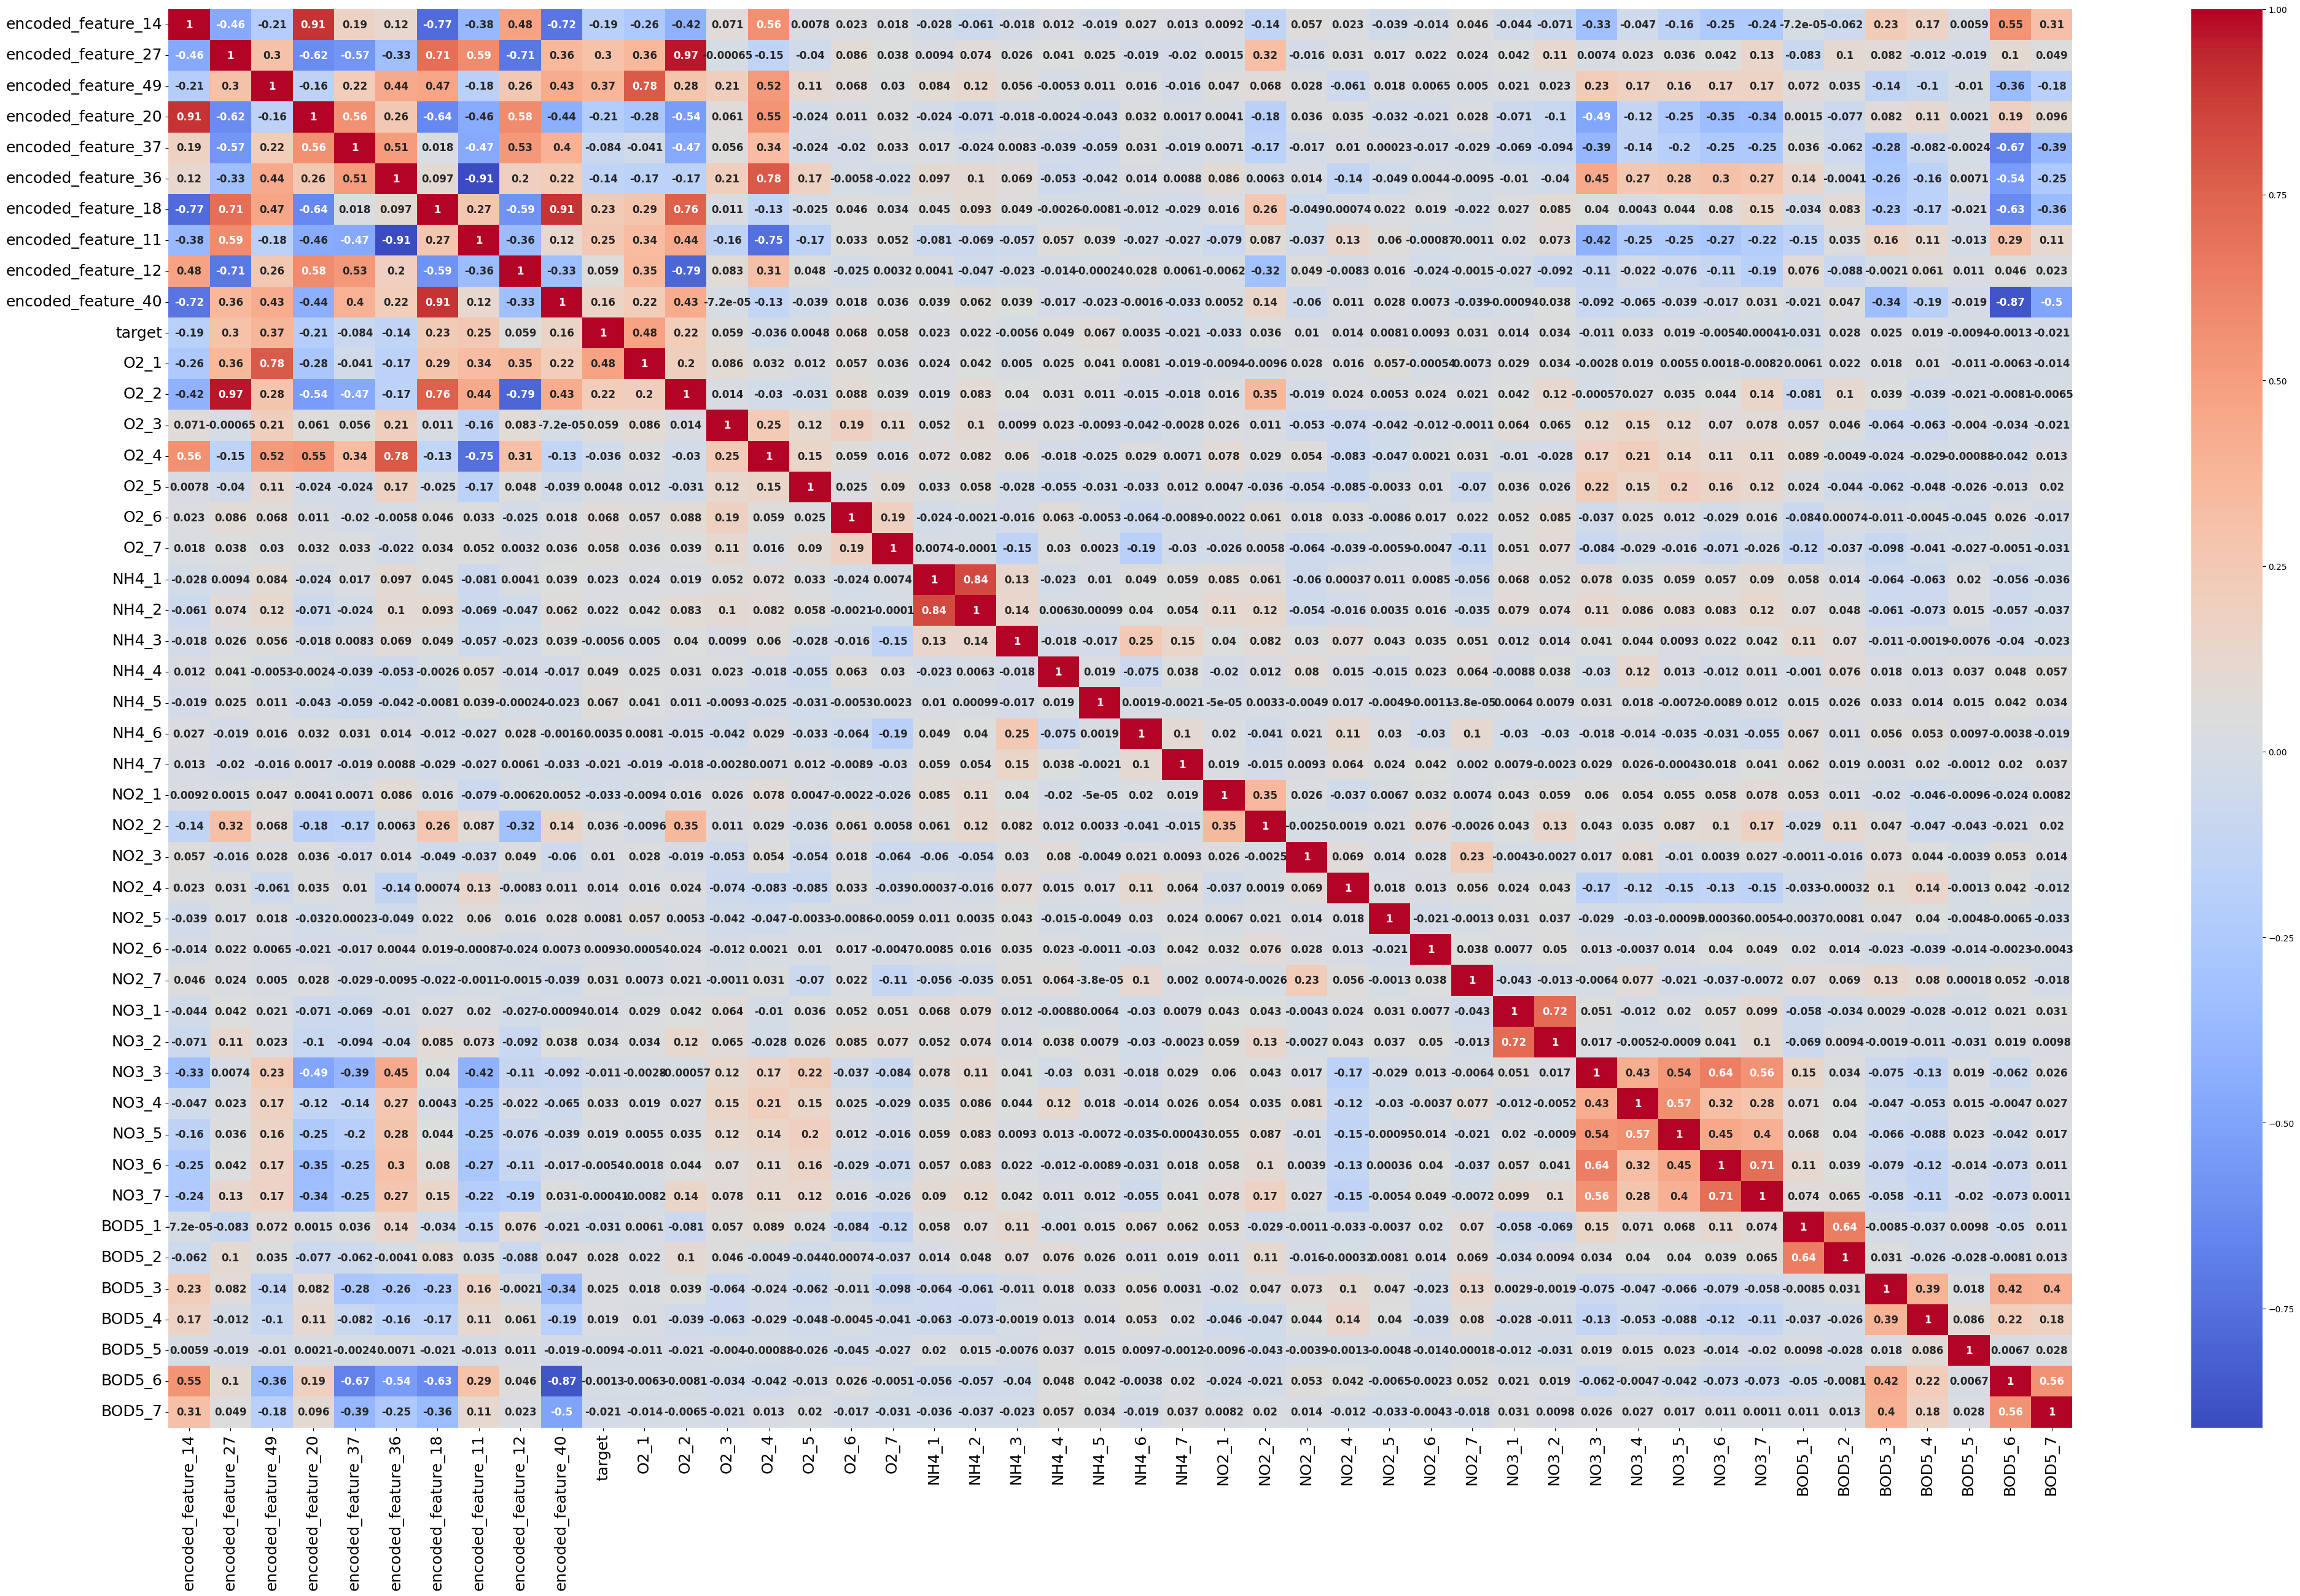

In [65]:
plt.figure(figsize=(50,30))
sns.heatmap(X_combined.corr(), cmap='coolwarm', annot=True, annot_kws={"size": 12, "weight": "bold"})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [66]:
correlation_matrix_11 = X_combined.corr()
correlations_with_target_11 = correlation_matrix_11['target']
print(correlations_with_target_11)

encoded_feature_14   -0.188045
encoded_feature_27    0.295665
encoded_feature_49    0.374072
encoded_feature_20   -0.213057
encoded_feature_37   -0.083950
encoded_feature_36   -0.142381
encoded_feature_18    0.231497
encoded_feature_11    0.254350
encoded_feature_12    0.058625
encoded_feature_40    0.157601
target                1.000000
O2_1                  0.481100
O2_2                  0.222749
O2_3                  0.059053
O2_4                 -0.035554
O2_5                  0.004754
O2_6                  0.068118
O2_7                  0.058312
NH4_1                 0.023005
NH4_2                 0.022311
NH4_3                -0.005626
NH4_4                 0.048865
NH4_5                 0.066669
NH4_6                 0.003465
NH4_7                -0.021345
NO2_1                -0.032626
NO2_2                 0.036352
NO2_3                 0.009995
NO2_4                 0.014110
NO2_5                 0.008138
NO2_6                 0.009271
NO2_7                 0.031066
NO3_1   

Top 10 features có độ tương quan cao

In [67]:
top_10_corr_vars = correlations_with_target_11.abs().sort_values(ascending=False).head(11).drop('target')

top_10_corr_vars

O2_1                  0.481100
encoded_feature_49    0.374072
encoded_feature_27    0.295665
encoded_feature_11    0.254350
encoded_feature_18    0.231497
O2_2                  0.222749
encoded_feature_20    0.213057
encoded_feature_14    0.188045
encoded_feature_40    0.157601
encoded_feature_36    0.142381
Name: target, dtype: float64

Trong số 10 tính năng tương quan tốt nhất với biến target, có 8 trên 10 tính năng mới được tạo ra tùy chỉnh để chứng minh rắng việc tạo tính năng mới khá hữu ích

KẾT LUẬN
- Cả 2 phương pháp đều sử dụng mô hình Autoencoder nhưng với 2 mục đích khác nhau
- Độ lỗi của Outliers: [-1.08910014 -1.0039778  -1.03417078 -1.00633341 -1.01270969]
- Độ lỗi của Feature Generation: [-1.94747935 -0.08213405 -0.1468705  -0.04908228 -0.04855349]
Ta thấy độ lỗi của Outliers nhỏ hơn
